<a href="https://colab.research.google.com/github/joaop-n12/Machine_Learning/blob/main/atv_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv('/home/tips.csv')
df['tip_ratio'] = df['tip'] / df['total_bill']
threshold = 0.1
df['tip_category'] = df['tip_ratio'].apply(lambda x: '1' if x > threshold else '0')

X = df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['tip_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['total_bill', 'size']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'day', 'time'])
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
results = {}

for solver in solvers:
    pipeline.set_params(classifier__solver=solver)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[solver] = accuracy
    print(f"Accuracy with solver {solver}: {accuracy}")

best_solver = max(results, key=results.get)
print(f"Best solver is: {best_solver}")



Accuracy with solver lbfgs: 0.9016393442622951
Accuracy with solver liblinear: 0.9016393442622951
Accuracy with solver newton-cg: 0.9016393442622951
Accuracy with solver newton-cholesky: 0.9016393442622951
Accuracy with solver sag: 0.9016393442622951
Accuracy with solver saga: 0.9016393442622951
Best solver is: lbfgs


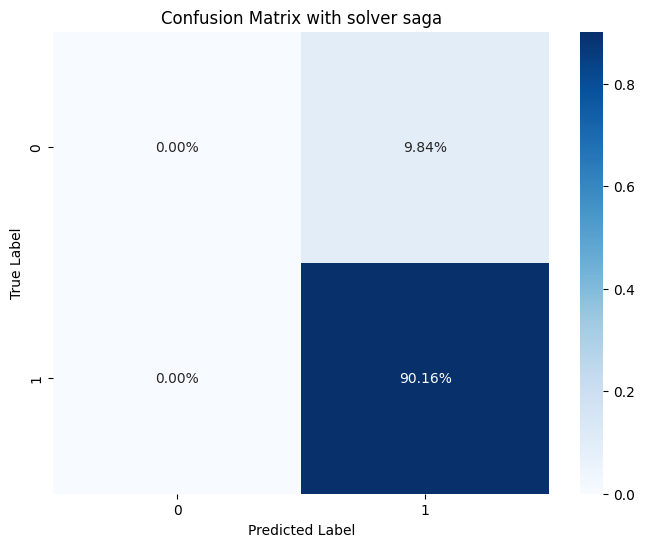

In [ ]:
matrix = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix / np.sum(matrix), annot=True, fmt='.2%', cmap='Blues',
xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title(f"Confusion Matrix with solver {solver}")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
best_solver = max(results, key=results.get)